<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/critical_transitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

mpl.rcParams['figure.figsize'] = (14,7)
mpl.rcParams["grid.linestyle"] = "--"
mpl.rcParams["axes.xmargin"] = 0
mpl.rcParams["axes.ymargin"] = 0
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.fontsize'] = 14


### Scheffer et al. (2001)

$$ \frac{dx}{dt} = a - bx + rf(x) $$

with the Hill function:

$$ f(x) = \frac{x^p}{x^p + h^p} $$

---

### The **Hill** function



[]

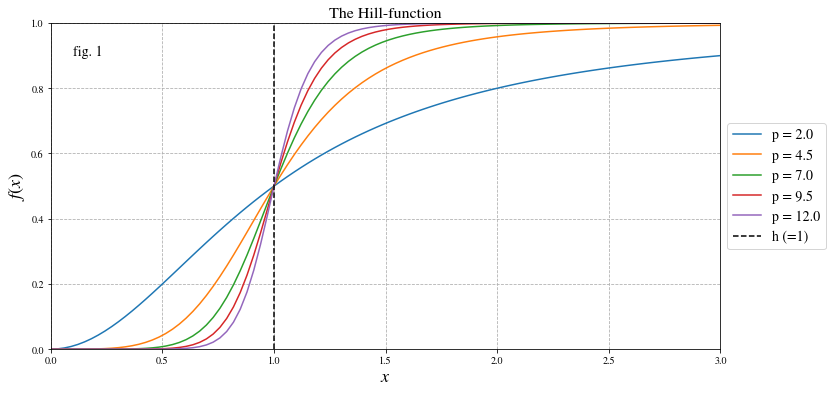

In [137]:
### define coefficients and range
h = 1
P = np.linspace(2,12, num=5)
X = np.linspace(0, 3, 100)

### obtaining x and f(x) to plot
for p in P:
    FX = np.empty(len(X))
    for k in range(len(X)):
        FX[k] = X[k]**p/(X[k]**p + h**p)
    plt.plot(X, FX, label = "p = " +str(p))

### plot parameters
plt.plot([h,h],[0,1], 'k--', label = 'h (='  + str(h) + ')')
plt.title('The Hill-function')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x)$', fontsize=18)
plt.grid()
plt.text(0.1, .9, 'fig. 1', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

### Evolution of $x$ in time

$$ x_{t+1} = x_t + \Delta x_t $$

where

$$ \Delta x_t = a + bx + \frac{x_t^p}{x_t^p + h^p} $$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

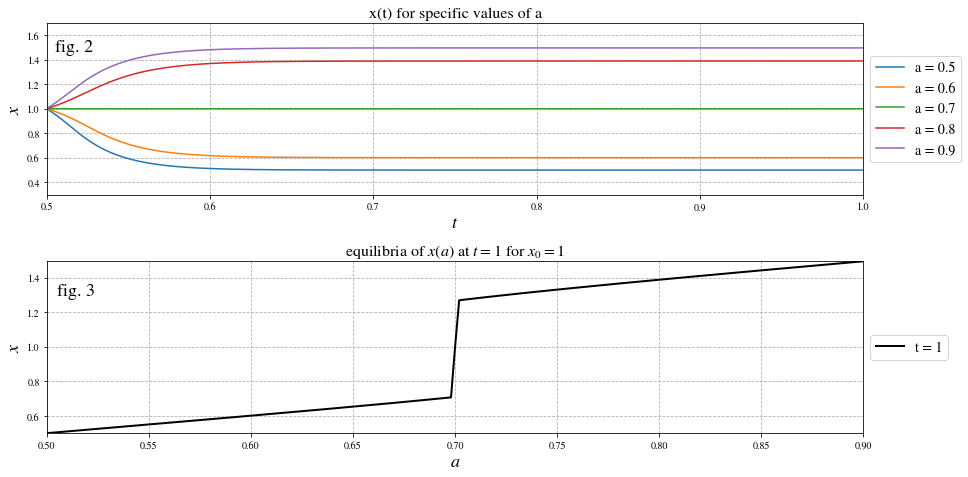

In [138]:
### define coefficients and range
h, b, p, r = 1, 1, 12, 0.6; 
tol = 1e-4
A, XA = [], []
T = np.linspace(0.5, 1, 2000)

#vary parameter a in a range of (0.5,0.9):
for a in np.linspace(0.5, 0.9, num=200 +1):
    X = np.empty(len(T)); x = 1; 
    #calculate x(t) for parameter t in a range of (0.5,1):
    for i in range(len(T)):
        #the difference equation:
        delta_x = a - b * x + r *(x**p / (x**p + h**p))
        x += delta_x/100
        X[i] = x
    #plot x(t) for specific values of parameter a:
    if abs(a*10 - round(a*10)) < tol:
        plt.subplot(2, 1, 1)
        plt.plot(T, X, label = 'a = ' + str(a))
    A.append(a)
    XA.append(x)

### configure plot properties for subplot(2, 1, 1):
plt.tight_layout(h_pad=5)
plt.title('x(t) for specific values of a')
plt.axis((0.5,1,0.3,1.7))
plt.xlabel('$t$', fontsize=18); plt.ylabel('$x$', fontsize=18)
plt.grid()
plt.text(0.505, 1.47, 'fig. 2', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### plot x(a) at t=1 and configure plot properties:
plt.subplot(2, 1, 2)
plt.title('equilibria of $x(a)$ at $t = 1$ for $x_0 = 1$')
plt.plot(A,XA,color = 'black', label = 't = 1', linewidth=2, linestyle = '-')
plt.xlabel('$a$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.grid()
plt.text(0.505, 1.3, 'fig. 3', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Equilibria (extrema) of $x$ in time

Consider the function $g(x)$, such that

$$ g(x) = \frac{dx}{dt} = a + bx + \frac{rx^p}{x^p + h^p} $$

which can be used to analize the derivative of $x$. So, in order to find the equilibria of $x$, the points must satisfy $g(x)=0$ numerically with a tolerance of $\pm 10^{-4}$.

Finally, to determine the stability of the equilibria of the system, we can evaluate the derivative of $g(x)$ with respect to $x$.

- $\frac{dg}{dx} < 0$: stable 
- $\frac{dg}{dx} > 0$: unstable
- $\frac{dg}{dx} = 0$: need more information

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

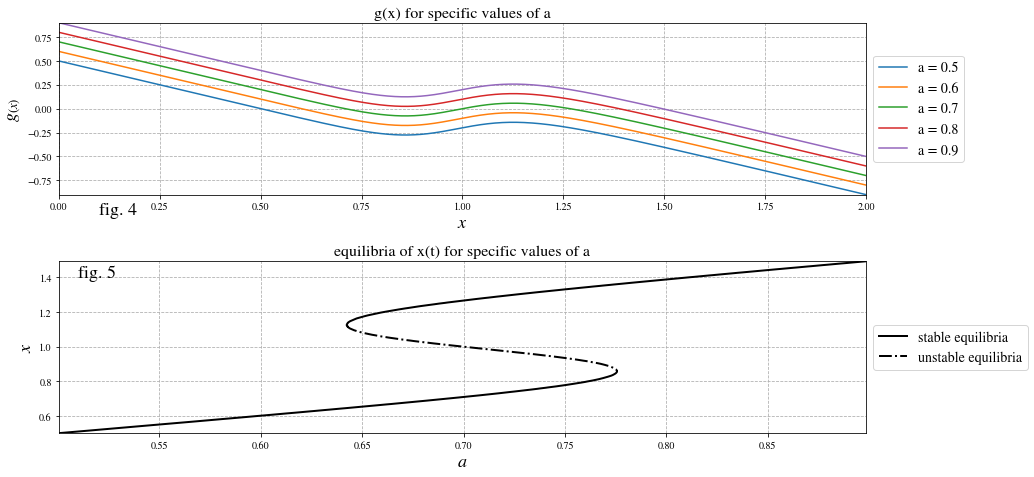

In [139]:
### equilibria of x(t)

# fig = plt.figure(figsize=(15,7))
EX1 = []; EX2 = []; EX3 = []
X = np.linspace(0,2,1000)
h, b, p, r = 1, 1, 12, 0.6; 
tol = 10**-4

for a in np.linspace(0.5, 0.9, num=1000+1):
    GX = np.empty(len(X))
    #calculate g(x) for parameter t in a range of (0,2):
    for i in range(len(X)):
        gx = a-b*X[i] + (r*X[i]**p)/(X[i]**p + h**p)
        GX[i] = gx
        if abs(gx) < tol:
            #calculate g'(x) (= dg(x)/dx) to "check" stability:
            Dgx = -b+(r*p*X[i]**(p-1)*h**p)/((X[i]**p + h**p)**2)
            #write x-coordinate of extremum and depending value of parameter a in an array:
            if Dgx > 0: EX2.append([a, X[i]])      #array for unstable extrema
            if Dgx < 0:                        
                if X[i] < 1: EX1.append([a, X[i]])    #array for stable extrema with x<1
                if X[i] > 1: EX3.append([a, X[i]])    #array for stable extrema with x>1
    #plot f(x) for specific values of a:
    if len(str(a)) == 3:        
        plt.subplot(2, 1, 1)
        plt.plot(X,GX,label = 'a = ' + str(a))
    a += 0.0001

#configure plot properties for subplot(2, 1, 1):
plt.subplot(2, 1, 1);
plt.tight_layout(h_pad=5)
plt.title('g(x) for specific values of a')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$g_{(x)}$', fontsize=18)

plt.grid()
plt.text(0.1, -1.1, 'fig. 4', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# #sort equilibria containing arrays in respect to the increasing order of parameter a:
EX1 = np.array(EX1); EX1x = EX1[:,0]; EX1y = EX1[:,1]
EX2 = np.array(EX2); EX2x = EX2[:,0]; EX2y = EX2[:,1]
EX3 = np.array(EX3); EX3x = EX3[:,0]; EX3y = EX3[:,1]

### plot curve representing equilibria of x depending on the variation of parameter a:
plt.subplot(2, 1, 2);
    ### lower part of the curve (stable extrema):
plt.plot(EX1x, EX1y, color = 'k', linewidth=2, label = 'stable equilibria');
    ### central part of the curve (unstable extrema):
plt.plot(EX2x, EX2y, color = 'k', linewidth=2, label = 'unstable equilibria', linestyle = 'dashdot');
    ### upper part of the curve (stable extrema):
plt.plot(EX3x, EX3y, color = 'k', linewidth=2);

### configure plot properties:
plt.title('equilibria of x(t) for specific values of a')
plt.grid();
plt.xlabel('$a$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.text(0.51, 1.4, 'fig. 5', fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Hysteresis and critical transition



In [256]:
#hysteresis plotting function

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

shift = 0
seg_size = 4
n = 6

def hysteresis(EX1,EX2,EX3,x_label,tol):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    EX1x = EX1[:,0]; EX1y = EX1[:,1]
    EX2x = EX2[:,0]; EX2y = EX2[:,1]
    EX3x = EX3[:,0]; EX3y = EX3[:,1]
    
    #plot curve containing the extrema, splitted in lower (solid line), central (dashdotted line)
    #and upper part (solid line) in black color:
    ax.plot(EX1x,EX1y,color = 'k', linewidth=2, label = 'stable equilibria')
    ax.plot(EX2x,EX2y,color = 'k', linewidth=2, linestyle = 'dashdot', label = 'unstable equilibria')
    ax.plot(EX3x,EX3y,color = 'k', linewidth=2)
    
    ### plot development of x_extremum starting at maximum value of parameter a
    #find x-coordinate in EX3x at which critical transition occurs:
    for i in range(len(EX3x)):
        if  abs(EX1x[-1] - EX3x[i]) < tol:
            index1 = i
    UPx = np.concatenate((EX1x, [EX1x[-1]], EX3x[index1:]))
    UPy = np.concatenate((EX1y, [EX1y[-1]], EX3y[index1:]))
    
    line, = ax.plot(UPx,UPy,color = 'c', linewidth=4, linestyle='-',
            label='$x_{eq}$ for increasing \nvalues of '
            + x_label + ', starting at ' + x_label + '$_{min}$')
    #line.set_dashes((dash_length,dash_distance)) allows to vary the dash-style
    line.set_dashes((4,4)); line.set_dash_capstyle('round')

    for i in range(n):
        x = UPx[seg_size*3*(i):seg_size*3*(i+1)]
        y = UPy[seg_size*3*(i):seg_size*3*(i+1)] + shift

        style="Simple,head_length=10,head_width=13,tail_width=1"
        arrow = FancyArrowPatch((x[0], y[0]), (x[2], y[2]), arrowstyle=style, color="c")
        ax.add_artist(arrow)
    
    ### plot development of x_extremum starting at minimum value of parameter a
    #find x-coordinate in EX1x at which critical transition occurs:
    for k in range(len(EX1x)):
        if  abs(EX3x[0] - EX1x[k]) < tol:
            index2 = k
    DOWNx = np.concatenate((EX1x[:index2], [EX3x[0]], EX3x))
    DOWNy = np.concatenate((EX1x[:index2], [EX3y[0]], EX3y))

    line, = ax.plot(DOWNx,DOWNy,color = 'r', linewidth=4, linestyle='-',
            label='$x_{eq}$ for decreasing \nvalues of '
            + x_label + ', starting at ' + x_label + '$_{max}$')
    line.set_dashes((3,4)); line.set_dash_capstyle('round')

    for i in range(n):
        x = DOWNx[index1 + seg_size*3*(i):index1 + seg_size*3*(i+1)]
        y = DOWNy[index1 + seg_size*3*(i):index1 + seg_size*3*(i+1)] + shift

        style="Simple,head_length=10,head_width=13,tail_width=1"
        arrow = FancyArrowPatch((x[2], y[2]), (x[0], y[0]), arrowstyle=style, color="r")
        ax.add_artist(arrow)

    return ax, index1, index2

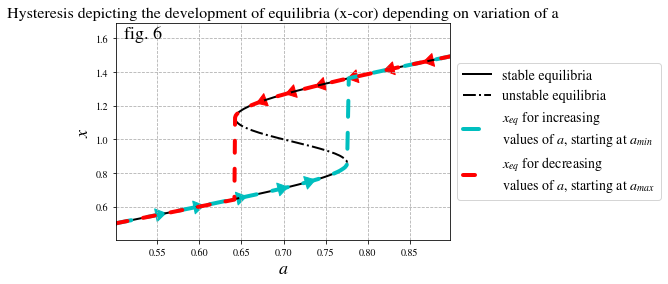

In [257]:
### plot hysteresis

ax, index3, index1 = hysteresis(EX1, EX2, EX3, '$a$', 0.005)

#configure plot properties:
ax.set_title('Hysteresis depicting the development of equilibria (x-cor) depending on variation of a')
ax.grid();
ax.set_xlabel('$a$',fontsize=18);
ax.set_ylabel('$x$',fontsize=18);
ax.set_xlim([EX1x[0],EX3x[-1]])
ax.set_ylim([EX1y[0]-0.1,EX3y[-1]+0.2])
ax.text(0.51, 1.6, 'fig. 6', fontsize=18)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[0.5164 0.55  ] [0.61651652 0.65055055]
[0.5816 0.5836] [0.68258258 0.68458458]
[0.6148 0.6168] [0.71661662 0.71861862]
[0.6584 0.662 ] [0.76266266 0.76666667]
[0.6976 0.6992] [0.80670671 0.80870871]
[0.7248 0.7292] [0.84074074 0.84674675]
[0.7492 0.7504] [0.87677678 0.87877878]
[0.7668 0.7688] [0.91281281 0.91881882]
[0.7756 0.7776] [0.95685686 1.46336336]
[0.8116 0.8136] [1.5014014 1.5034034]


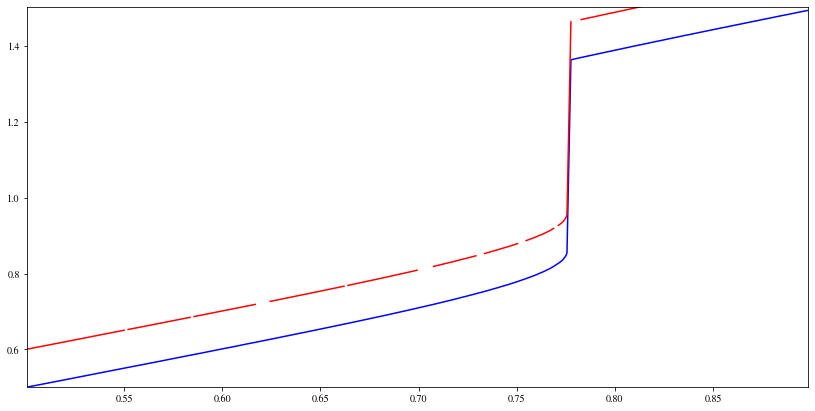

In [217]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
from matplotlib.patches import FancyArrowPatch

X = np.linspace(0,4*np.pi,10000)
Y = np.sin(X)

# fig, ax = plt.subplots(1,1)
plt.plot(UPx,UPy,color='blue')

shift = 0.1
seg_size = 10

i = 0

for i in range(10):
    x = UPx[seg_size*i:seg_size*(i+1)]
    y = UPy[seg_size*i:seg_size*(i+1)]+shift

    plt.plot(x, y, color="r")

    print(x[-2:], y[-2:])
    # posA, posB = x[-2:], y[-2:]
    # edge_width = 2.
    # arrowstyle = "fancy,head_length={},head_width={},tail_width={}".format(2*edge_width, 3*edge_width, edge_width)
    # arrow = FancyArrowPatch(posA=posA, posB=posB, arrowstyle=arrowstyle, color='k')
    # ax.add_artist(arrow)

    i += seg_size*2

20

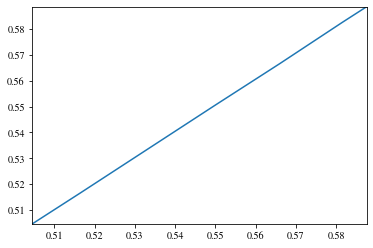

In [143]:
plt.plot(UPx[2:2+20], UPy[2:2+20])
len(UPx)//6

In [144]:
zzzz = [1,2,3,4]
zzzz[-1]

4